## Read excel data into pandas dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataframe = pd.read_excel('social_data.xlsx')
display(dataframe)

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video
...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0,0,Link
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0,0,Link
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0,0,Link
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116,42,Text


## Data preprocessing
### 1. Remove extra spaces

In [2]:
def remove_spaces(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype == object:
            dataframe[column] = dataframe[column].str.rstrip()
    return dataframe

dataframe = remove_spaces(dataframe)
display(dataframe)


,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video
...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0,0,Link
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0,0,Link
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0,0,Link
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116,42,Text


### 2. Delete rows where impressions < engagement, both impressions and engagements is zero

In [3]:
dataframe = dataframe[dataframe['Total Impressions'] != 0]
dataframe = dataframe[dataframe['Total Engagements'] <= dataframe['Total Impressions']]
display(dataframe)

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882,83,Photo
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892,3076,Video
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874,1447,Video
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692,8044,Photo
...,...,...,...,...,...,...,...
3463,2023-01-04 13:17:28.473,General,TWITTER,N/A,393,18,Text
3464,2023-01-04 13:00:02.187,General,TWITTER,Community Engagement,136660,2371,Photo
3465,2023-01-04 13:00:01.000,General,FBPAGE,Community Engagement,29051,811,Photo
3470,2023-01-03 13:34:33.887,General,TWITTER,N/A,7704,153,Text


## Q1. Calculate typical engagement rate we can expect and likelihood that we can achieve a 15% engagement rate?

### Calculate Engagment Rate

In [4]:
dataframe['Engagement Rate'] = (dataframe['Total Engagements'] / dataframe['Total Impressions']) * 100
display(dataframe)


,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882,83,Photo,4.410202
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892,3076,Video,17.192041
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874,1447,Video,10.429581
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692,8044,Photo,21.341399
...,...,...,...,...,...,...,...,...
3463,2023-01-04 13:17:28.473,General,TWITTER,N/A,393,18,Text,4.580153
3464,2023-01-04 13:00:02.187,General,TWITTER,Community Engagement,136660,2371,Photo,1.734963
3465,2023-01-04 13:00:01.000,General,FBPAGE,Community Engagement,29051,811,Photo,2.791642
3470,2023-01-03 13:34:33.887,General,TWITTER,N/A,7704,153,Text,1.985981


### Add four time dimensions - hour of the day, day of the week, week of the year, month of the year to understand their effect on engagement rate

In [5]:
dataframe['Hour'] = dataframe['Published Date'].dt.hour
dataframe['Day'] = dataframe['Published Date'].dt.day_name()
dataframe['Week'] = dataframe['Published Date'].dt.isocalendar().week
dataframe['Month'] = dataframe['Published Date'].dt.month
display(dataframe)

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Hour,Day,Week,Month
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628,19,Friday,13,3
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882,83,Photo,4.410202,19,Friday,13,3
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892,3076,Video,17.192041,19,Friday,13,3
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874,1447,Video,10.429581,18,Friday,13,3
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692,8044,Photo,21.341399,18,Friday,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3463,2023-01-04 13:17:28.473,General,TWITTER,N/A,393,18,Text,4.580153,13,Wednesday,1,1
3464,2023-01-04 13:00:02.187,General,TWITTER,Community Engagement,136660,2371,Photo,1.734963,13,Wednesday,1,1
3465,2023-01-04 13:00:01.000,General,FBPAGE,Community Engagement,29051,811,Photo,2.791642,13,Wednesday,1,1
3470,2023-01-03 13:34:33.887,General,TWITTER,N/A,7704,153,Text,1.985981,13,Tuesday,1,1


### Average Engagement Rate

In [6]:
average_engagement_rate = dataframe['Engagement Rate'].mean()
print(average_engagement_rate)

5.347237866111801


In [7]:
dataframe.describe()

,Total Impressions,Total Engagements,Engagement Rate,Hour,Week,Month
count,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000
mean,13972.496340,1204.689605,5.347238,12.486091,7.524524,2.105783
std,32743.781714,3874.055402,7.184530,3.466557,3.164440,0.758795
min,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000
25%,1058.000000,16.000000,1.425093,10.000000,5.000000,2.000000
50%,4371.000000,93.000000,3.080242,13.000000,8.000000,2.000000
75%,16330.250000,461.500000,6.160553,15.000000,10.000000,3.000000
max,753227.000000,95062.000000,100.000000,23.000000,13.000000,3.000000


### Function to get ER rate for each column in the data

In [8]:
# input ---> Month
# output ----> {"1":6.75, "2":4.89, "3":4.9}
# get_avg_er_rate(column="Month") --> Month data
# get_avg_er_rate(column="Day") --> Day data

def get_avg_er_rate(dataframe, column):

    if column not in dataframe.columns:
        print("Invalid column name.")
        return

    return dataframe.groupby(column)["Engagement Rate"].mean().to_dict()

### Analysing the likelihood of engagement rate increasing or decreasing based on monthly data

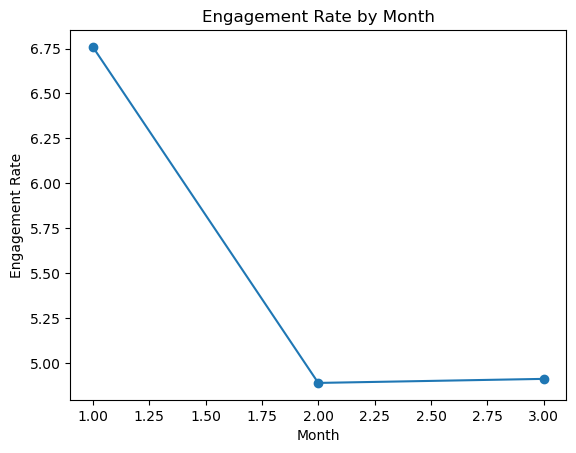

{1: 6.758930417712869, 2: 4.8900045385021125, 3: 4.912496238701063}


In [9]:
er_rate_by_month = get_avg_er_rate(dataframe=dataframe,column="Month")
# Extract x and y values from the dictionary
x_values = list(er_rate_by_month.keys())
y_values = list(er_rate_by_month.values())
# Plotting the line graph
plt.plot(x_values, y_values, marker='o')
# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by Month')
# Displaying the graph
plt.show()

print(er_rate_by_month)

### Conclusion: We can see that the typical engagement rate has been declining over three months. There seems to be less likelyhood to get 15% of engagement rate.

## Q2. Does day of the week and time of posting affect engagement rates?

### Analysing the engagement rate based on day and hour data.

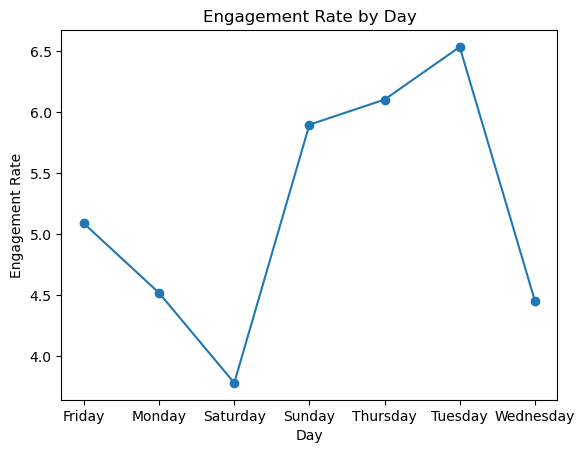

{'Friday': 5.08729811883855, 'Monday': 4.517344555422831, 'Saturday': 3.7795300701296313, 'Sunday': 5.897657398367543, 'Thursday': 6.103461848875516, 'Tuesday': 6.535451073060155, 'Wednesday': 4.453678112562045}


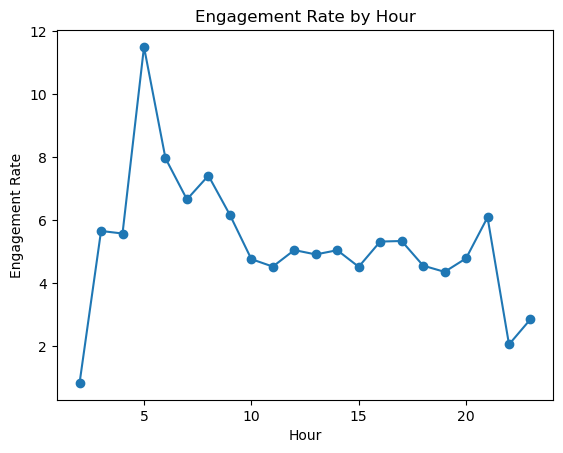

{2: 0.8401557661055407, 3: 5.656221448685829, 4: 5.57534619879171, 5: 11.4889987217992, 6: 7.9622714113563875, 7: 6.65684904899165, 8: 7.409689116190584, 9: 6.166991273789989, 10: 4.763515531108613, 11: 4.527071170010842, 12: 5.050604853105029, 13: 4.912187834724815, 14: 5.046389621953564, 15: 4.520424015435457, 16: 5.320484003420766, 17: 5.337954959522491, 18: 4.557920649707291, 19: 4.3598138129885315, 20: 4.7879068667460905, 21: 6.089147065549976, 22: 2.05943321497397, 23: 2.859393901007278}


In [10]:
er_rate_by_day = get_avg_er_rate(dataframe=dataframe,column="Day")
# Extract x and y values from the dictionary
x_values = list(er_rate_by_day.keys())
y_values = list(er_rate_by_day.values())
# Plotting the line graph
plt.plot(x_values, y_values, marker='o')
# Adding labels and title
plt.xlabel('Day')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by Day')
# Displaying the graph
plt.show()

print(er_rate_by_day)

er_rate_by_hour = get_avg_er_rate(dataframe=dataframe,column="Hour")
# Extract x and y values from the dictionary
x_values = list(er_rate_by_hour.keys())
y_values = list(er_rate_by_hour.values())
# Plotting the line graph
plt.plot(x_values, y_values, marker='o')
# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by Hour')
# Displaying the graph
plt.show()


print(er_rate_by_hour)

### Conclusion: Based on the above engagement rate trend over the week and different times of the day we can see that the rate is highest on Tuesday and 5:00 AM appears to have the maximum engagement rate.

## Q3. How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?

### We now create a new data frame omitting the rows that have Account name as General or Content Creators. Since the question is to decide on what is social engagement of specific games, we decide to remove data related to General and Content Creators Account as they do not seem to be a specific game name.

In [12]:
#display(dataframe)
gamedata = dataframe[(dataframe['Account'] != 'General') & (dataframe['Account'] != 'Content Creators')]
display(gamedata)  


,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Hour,Day,Week,Month
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628,19,Friday,13,3
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882,83,Photo,4.410202,19,Friday,13,3
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892,3076,Video,17.192041,19,Friday,13,3
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874,1447,Video,10.429581,18,Friday,13,3
11,2023-03-31 18:30:33.067,DOTA2,TWITTER,N/A,1013,153,Link,15.103653,18,Friday,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3434,2023-01-09 09:59:56.074,CSGO,TWITTER,N/A,2266,71,Text,3.133274,9,Monday,2,1
3456,2023-01-05 16:59:51.782,DOTA2,TWITTER,N/A,4357,254,Text,5.829699,16,Thursday,1,1
3459,2023-01-05 09:00:25.769,CSGO,TWITTER,Community Engagement,445130,10597,Video,2.380653,9,Thursday,1,1
3462,2023-01-04 14:57:18.216,DOTA2,TWITTER,N/A,22708,2266,Photo,9.978862,14,Wednesday,1,1


In [13]:
display(gamedata['Account'].unique())

array(['CSGO', 'DOTA2', 'Valorant'], dtype=object)

### Analysing the engagement rate based on game title data.

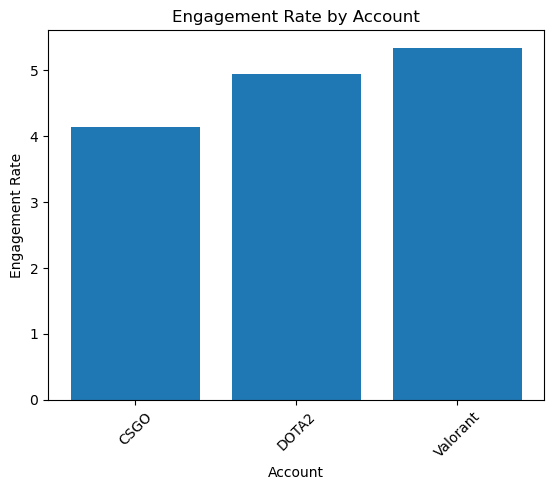

In [14]:
er_rate_by_game = get_avg_er_rate(dataframe=gamedata,column="Account")  
# Extract x and y values from the dictionary
x_values = list(er_rate_by_game.keys())
y_values = list(er_rate_by_game.values())

# Plotting the bar graph
plt.bar(x_values, y_values)

# Adding labels and title
plt.xlabel('Account')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by Account')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Displaying the graph
plt.show()

### Conclusion: Game titles do have an impact on the social engagement. Based on the plot above, CSGO needs more attention to gain social enagement as it has the least engagement rate among the three games.


## Q4. What media type performs the best?

### In order to know which media type has the highest impact we rerun the function on the cleaned up data file, dataframe which includes the data from General and Content Creators accounts as well.

### Analysing the engagement rate based on media data.

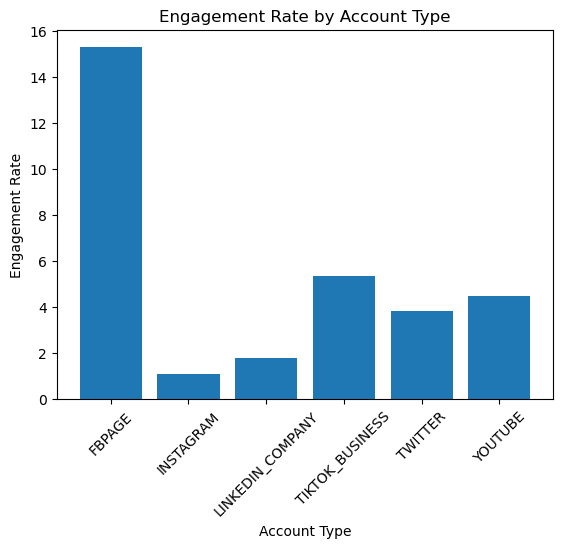

In [15]:
er_rate_by_Media = get_avg_er_rate(dataframe=dataframe,column="Account Type")
# Extract x and y values from the dictionary
x_values = list(er_rate_by_Media.keys())
y_values = list(er_rate_by_Media.values())

# Plotting the bar graph
plt.bar(x_values, y_values)

# Adding labels and title
plt.xlabel('Account Type')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by Account Type')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Displaying the graph
plt.show()



### Conclusion: Based on the plot above, it is evident FB page engagement works the best among all the media types.

## Q5. What is our best performing campaign?

### We now create a new dataframe from the cleaned up file dataframe to remove N/A values in the Campaign Name column.

### Analysing the engagement rate based on campaign data.


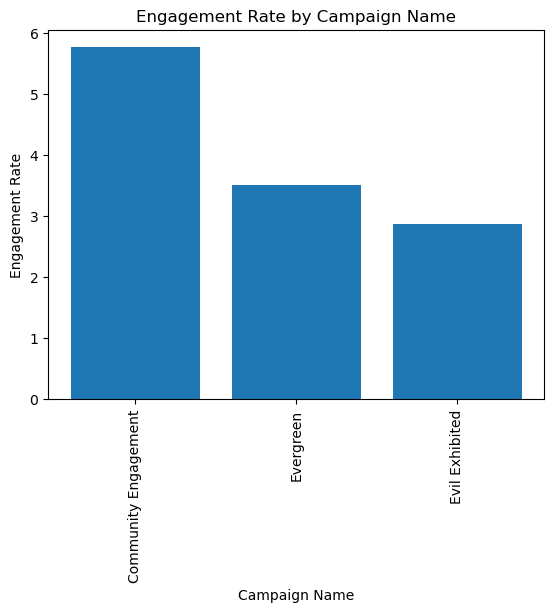

In [16]:
campaign_data = dataframe[dataframe['Campaign Name'] != 'N/A']
er_rate_by_campaigndata = get_avg_er_rate(dataframe=campaign_data, column="Campaign Name")
# Extract x and y values from the dictionary
x_values = list(er_rate_by_campaigndata.keys())
y_values = list(er_rate_by_campaigndata.values())

# Plotting the bar graph
plt.bar(x_values, y_values)

# Adding labels and title
plt.xlabel('Campaign Name')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by Campaign Name')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=90)

# Displaying the graph
plt.show()

### Conclusion: Based on the analysis done, it is observed that the Community Engagement campaign has the most engagement rate.

## Q6. Define out a posting strategy for our social channels based on your discoveries.

### Position Strategies:

### Based on the finding from the data, the social channel that need to be used more is Community Engagement and Fb Page positing. Sunday, Thursday and Tuesday seem to have high engagement rates so making Fb page positings on these days and the early hours of these days between 5 AM and 10 AM have better engagement rates.

## Q7.What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?

### Suggestions to Expand Social Presense:

### It is observed that Fb page postings are working well for the social engagement of the games. Since Youtube and TikTok business are the media types that are having better social engagements apart from Fb page, it can be suggested to expand the presence of games into YouTube and TikTok Business.
